In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [125]:
# Read in CSV file

df = pd.read_csv('plate9290_RVs.csv').drop(['Unnamed: 0', 'Plate ID'], axis=1)

In [126]:
df

,Target ID,MJD,OBSVHELIO (km/s)
0,apo25m.5226.150-08-RV.2M03252400+4614203,57706,-86.565704
1,apo25m.5226.150-08-RV.2M03252400+4614203,57732,-86.383430
2,apo25m.5226.150-08-RV.2M03252400+4614203,57734,-86.386870
3,apo25m.5226.150-08-RV.2M03252400+4614203,57735,-86.532840
4,apo25m.5226.150-08-RV.2M03252400+4614203,57760,-86.366640
...,...,...,...
3627,apo25m.5226.150-08-RV.2M03415658+4626067,58068,-26.490055
3628,apo25m.5226.150-08-RV.2M03415658+4626067,58085,-26.595278
3629,apo25m.5226.150-08-RV.2M03415658+4626067,58087,-26.603954
3630,apo25m.5226.150-08-RV.2M03415658+4626067,58114,-26.599243


## Step 1
- Plot ΔRV against MJD, try to locate pattern

## To Do
- ~For unique target in total df, create df for just that target's data~
- ~Take RV data for each target and calculate avg~
- ~For each RV data point in each df, find ΔRV = RV - RVavg~
- ~Combine all ΔRVs for all dfs, add to total df~
- ~Plot y=ΔRV, x=MJD~

In [127]:
# Identify list of unique targets

unique_targets = Counter(df['Target ID'])
unique_targets_list = unique_targets.keys()

In [141]:
len(unique_targets)

227

In [129]:
# Obtain average RV and ΔRV for each target

all_delta_rvs = []
all_avg_rvs = []

for target in unique_targets_list:
    target_df = df[df['Target ID'] == target]
    target_rvs = list(target_df['OBSVHELIO (km/s)'])
    avg_rv = sum(list(target_df['OBSVHELIO (km/s)'])) / 16
    delta_rvs = []
    for trv in target_rvs:
        delta_rv = abs(avg_rv) - abs(trv)
        delta_rvs.append(delta_rv)
        all_avg_rvs.append(avg_rv)
        # print(abs(trv))
        # print(delta_rv)
    # print(target_rvs)
    all_delta_rvs.append(delta_rvs)
    # print(avg_rv)

In [142]:
# Flatten list of all ΔRVs

flat_all_delta_rvs = [item for sublist in all_delta_rvs for item in sublist]
# flat_all_delta_rvs

In [143]:
max(flat_all_delta_rvs)

250004.225713775

In [135]:
# Add average RV and ΔRV columns to dataframe

df['Avg RV'] = all_avg_rvs
df['ΔRV'] = flat_all_delta_rvs

In [144]:
# Updated dataframe!

df

,Target ID,MJD,OBSVHELIO (km/s),Avg RV,ΔRV
0,apo25m.5226.150-08-RV.2M03252400+4614203,57706,-86.565704,-86.460343,-0.105361
1,apo25m.5226.150-08-RV.2M03252400+4614203,57732,-86.383430,-86.460343,0.076913
2,apo25m.5226.150-08-RV.2M03252400+4614203,57734,-86.386870,-86.460343,0.073473
3,apo25m.5226.150-08-RV.2M03252400+4614203,57735,-86.532840,-86.460343,-0.072497
4,apo25m.5226.150-08-RV.2M03252400+4614203,57760,-86.366640,-86.460343,0.093703
...,...,...,...,...,...
3627,apo25m.5226.150-08-RV.2M03415658+4626067,58068,-26.490055,-26.555161,0.065106
3628,apo25m.5226.150-08-RV.2M03415658+4626067,58085,-26.595278,-26.555161,-0.040117
3629,apo25m.5226.150-08-RV.2M03415658+4626067,58087,-26.603954,-26.555161,-0.048793
3630,apo25m.5226.150-08-RV.2M03415658+4626067,58114,-26.599243,-26.555161,-0.044082


<AxesSubplot:xlabel='MJD', ylabel='ΔRV'>

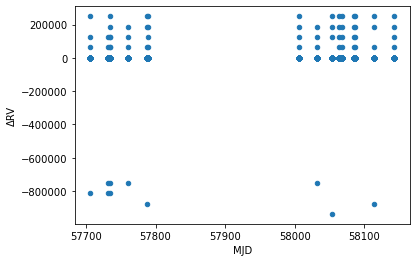

In [95]:
# Initial plot - lots of unexpected outliers?

df.plot(x = 'MJD', y = 'ΔRV', kind = 'scatter')

## Questions
- What is causing the weird outliers?
- What should be done about them?

## Step 2
- ?

## To Do
- ?

In [187]:
x = df['MJD']
y = df['ΔRV']

In [193]:
%matplotlib widget

In [194]:
plt.scatter(x, y)
plt.xlabel('MJD')
plt.ylabel('ΔRV [km/s]')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [138]:
df.sort_values(['ΔRV'], ascending=False)

,Target ID,MJD,OBSVHELIO (km/s),Avg RV,ΔRV
1053,apo25m.5226.150-08-RV.2M03302697+4703478,58087,0.0,250004.225714,250004.225714
1052,apo25m.5226.150-08-RV.2M03302697+4703478,58085,0.0,250004.225714,250004.225714
1051,apo25m.5226.150-08-RV.2M03302697+4703478,58068,0.0,250004.225714,250004.225714
1050,apo25m.5226.150-08-RV.2M03302697+4703478,58063,0.0,250004.225714,250004.225714
1049,apo25m.5226.150-08-RV.2M03302697+4703478,58054,0.0,250004.225714,250004.225714
...,...,...,...,...,...
2129,apo25m.5226.150-08-RV.2M03340241+4638066,57732,999999.0,187490.120951,-812508.879049
2130,apo25m.5226.150-08-RV.2M03340241+4638066,57734,999999.0,187490.120951,-812508.879049
1557,apo25m.5226.150-08-RV.2M03320675+4519114,57788,999999.0,125012.080229,-874986.919771
1566,apo25m.5226.150-08-RV.2M03320675+4519114,58114,999999.0,125012.080229,-874986.919771


In [106]:
df_test = df[df['Target ID'] == 'apo25m.5226.150-08-RV.2M03252400+4614203']

In [107]:
df_test

,Target ID,MJD,OBSVHELIO (km/s),ΔRV
0,apo25m.5226.150-08-RV.2M03252400+4614203,57706,-86.565704,-0.105361
1,apo25m.5226.150-08-RV.2M03252400+4614203,57732,-86.383430,0.076913
2,apo25m.5226.150-08-RV.2M03252400+4614203,57734,-86.386870,0.073473
3,apo25m.5226.150-08-RV.2M03252400+4614203,57735,-86.532840,-0.072497
4,apo25m.5226.150-08-RV.2M03252400+4614203,57760,-86.366640,0.093703
5,apo25m.5226.150-08-RV.2M03252400+4614203,57788,-86.563065,-0.102722
6,apo25m.5226.150-08-RV.2M03252400+4614203,57789,-86.457430,0.002913
7,apo25m.5226.150-08-RV.2M03252400+4614203,58006,-86.392876,0.067467
8,apo25m.5226.150-08-RV.2M03252400+4614203,58032,-86.379560,0.080783
9,apo25m.5226.150-08-RV.2M03252400+4614203,58054,-86.564070,-0.103727


<AxesSubplot:xlabel='MJD', ylabel='ΔRV'>

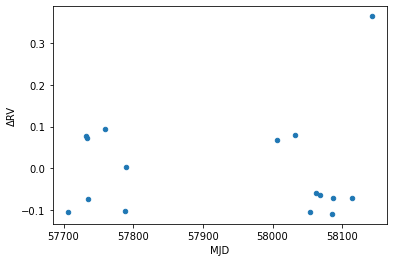

In [108]:
df_test.plot(x = 'MJD', y = 'ΔRV', kind = 'scatter')

<AxesSubplot:xlabel='MJD', ylabel='OBSVHELIO (km/s)'>

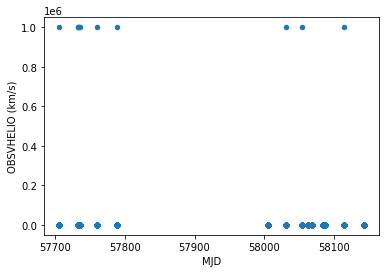

In [40]:
df.plot(x = 'MJD', y = 'OBSVHELIO (km/s)', kind = 'scatter')

In [157]:
features = ['MJD', 'OBSVHELIO (km/s)', 'Avg RV', 'ΔRV']

In [158]:
x2 = df.loc[:, features].values

In [159]:
y2 = df.loc[:, ['Target ID']].values

In [160]:
x2 = StandardScaler().fit_transform(x2)

In [167]:
x2.shape

(3632, 4)

In [168]:
np.mean(x2), np.std(x2)

(-1.173804078898844e-17, 0.9999999999999999)

In [169]:
feat_cols = ['feature'+str(i) for i in range(x2.shape[1])]

In [170]:
normalised_data = pd.DataFrame(x2,columns=feat_cols)

In [171]:
normalised_data.tail()

,feature0,feature1,feature2,feature3
3627,0.834782,-0.052604,-0.122209,0.000014
3628,0.938368,-0.052606,-0.122209,0.000012
3629,0.950555,-0.052606,-0.122209,0.000012
3630,1.115074,-0.052606,-0.122209,0.000012
3631,1.291780,-0.052603,-0.122209,0.000016


In [172]:
from sklearn.decomposition import PCA

In [173]:
pca = PCA(n_components = 2)

In [174]:
principalComponents = pca.fit_transform(x2)

In [175]:
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [176]:
principalDf.tail()

,principal component 1,principal component 2
3627,-0.109078,0.488988
3628,-0.113397,0.559901
3629,-0.113905,0.568244
3630,-0.120764,0.680872
3631,-0.128131,0.801843


In [177]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.50044152 0.2533061 ]


<Figure size 432x288 with 0 Axes>

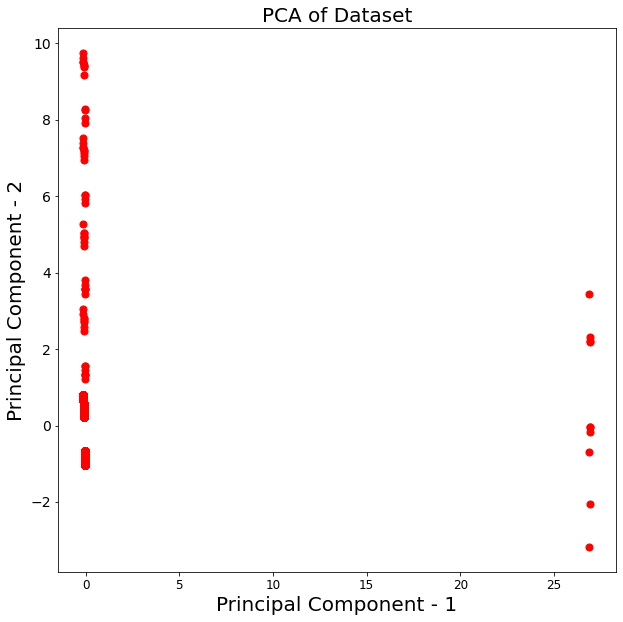

In [180]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("PCA of Dataset",fontsize=20)
targets = [df['Target ID']]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['Target ID'] == target
    plt.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

# plt.legend(targets,prop={'size': 15})

In [165]:
finalDf = pd.concat([principalDf, df[['Target ID']]], axis = 1)

In [166]:
finalDf

,principal component 1,principal component 2,Target ID
0,-0.018731,-1.022855,apo25m.5226.150-08-RV.2M03252400+4614203
1,-0.025336,-0.914397,apo25m.5226.150-08-RV.2M03252400+4614203
2,-0.025844,-0.906054,apo25m.5226.150-08-RV.2M03252400+4614203
3,-0.026098,-0.901884,apo25m.5226.150-08-RV.2M03252400+4614203
4,-0.032449,-0.797598,apo25m.5226.150-08-RV.2M03252400+4614203
...,...,...,...
3627,-0.109078,0.488988,apo25m.5226.150-08-RV.2M03415658+4626067
3628,-0.113397,0.559901,apo25m.5226.150-08-RV.2M03415658+4626067
3629,-0.113905,0.568244,apo25m.5226.150-08-RV.2M03415658+4626067
3630,-0.120764,0.680872,apo25m.5226.150-08-RV.2M03415658+4626067
